In [1]:
import pandas as pd
from time import time
df = pd.read_csv('data.csv')

In [2]:
df.head()

,match_id,radiant_adv_nw,radiant_adv_xp,radiant_adv_lh,radiant_win
0,0,707,1238,-39,True
1,1,-193,-1224,9,False
2,2,1035,1470,36,False
3,3,2464,2822,-7,False
4,4,6967,5261,150,True


In [3]:
X = df.iloc[:,1:4].values
y = df['radiant_win'].astype(int).values

# standardize scales
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))

X = scaler.fit_transform(X)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

## Linear SVM

In [5]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
t0 = time()
clf.fit(X_train, y_train)
print("training time:", round(time()-t0, 3), "s") 

training time: 33.327 s


In [7]:
t1 = time()
y_pred = clf.predict(X_test)
print("predict time:", round(time()-t1, 3), 's')

predict time: 4.793 s


In [9]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[3112 1547]
 [1434 3626]]
              precision    recall  f1-score   support

           0       0.68      0.67      0.68      4659
           1       0.70      0.72      0.71      5060

    accuracy                           0.69      9719
   macro avg       0.69      0.69      0.69      9719
weighted avg       0.69      0.69      0.69      9719



## Kernel SVM

In [10]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=1)

t0 = time()
svclassifier.fit(X_train, y_train)
print("training time:", round(time()-t0, 3), "s") # the time would be round to 3 decimal in seconds

training time: 38.573 s


In [11]:
t1 = time()
y_pred = svclassifier.predict(X_test)
print("predict time:", round(time()-t1, 3), 's')

predict time: 5.438 s


In [12]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3109 1550]
 [1436 3624]]
              precision    recall  f1-score   support

           0       0.68      0.67      0.68      4659
           1       0.70      0.72      0.71      5060

    accuracy                           0.69      9719
   macro avg       0.69      0.69      0.69      9719
weighted avg       0.69      0.69      0.69      9719



## Gaussian Kernel

In [13]:
svclassifier = SVC(kernel='rbf')
t0 = time()
svclassifier.fit(X_train, y_train)
print("training time:", round(time()-t0, 3), "s") # the time would be round to 3 decimal in seconds

training time: 63.891 s


In [14]:
t1 = time()
y_pred = svclassifier.predict(X_test)
print("predict time:", round(time()-t1, 3), 's')

predict time: 22.959 s


In [15]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3061 1598]
 [1370 3690]]
              precision    recall  f1-score   support

           0       0.69      0.66      0.67      4659
           1       0.70      0.73      0.71      5060

    accuracy                           0.69      9719
   macro avg       0.69      0.69      0.69      9719
weighted avg       0.69      0.69      0.69      9719



## Sigmoid Kernel

In [16]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid')

t0 = time()
svclassifier.fit(X_train, y_train)
print("training time:", round(time()-t0, 3), 's')

training time: 37.581 s


In [17]:
t1 = time()
y_pred = svclassifier.predict(X_test)
print("predict time:", round(time()-t1, 3), 's')

predict time: 6.814 s


In [18]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2577 2082]
 [2162 2898]]
              precision    recall  f1-score   support

           0       0.54      0.55      0.55      4659
           1       0.58      0.57      0.58      5060

    accuracy                           0.56      9719
   macro avg       0.56      0.56      0.56      9719
weighted avg       0.56      0.56      0.56      9719



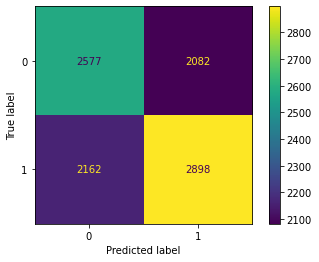

In [19]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(svclassifier, X_test, y_test) 